# Trial#1

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Objectives

- **Prizepool over the year?**  
  - sum of earnings throughout the year
  - (optional) compare with total players online from steamstat  
  ---
- **NaVi earnings year to year as a first TI winner?**
  - total navi earnings per year
  - compare with the rosters
  ---
- **Top 10 teams with most earnings and which country they belong?**
  - show year, team, country, earnings
  - group by year or by team
  - sort by earnings
  ---
- **Teams with the most frequent big3 champion? (2011-2021)**
  - show year, and 3 champion team every year
  - OR count total team within 1,2,3 place only

## Import CSV

In [62]:
roster_df = pd.read_csv("dota2_ti_2011_2021_rosters.csv")
turnamen_df = pd.read_csv("dota2_ti_2011_2021_tournaments.csv")

## Summary Data

In [71]:
display(turnamen_df.head())
roster_df.head()

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
0,The International,2011,2011-08-21,1,Natus Vincere,1000000,0.625000,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
1,The International,2011,2011-08-21,2,EHOME,250000,0.156250,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/592/40...
2,The International,2011,2011-08-21,3,Scythe Gaming,150000,0.093750,NaN,NaN,NaN,https://liquipedia.net/commons/images/0/0c/Scy...
3,The International,2011,2011-08-21,4,Meet Your Makers,80000,0.050000,NaN,NaN,NaN,https://liquipedia.net/commons/images/1/1d/Mee...
4,The International,2011,2011-08-21,5,Moscow Five,35000,0.021875,NaN,NaN,NaN,https://liquipedia.net/commons/images/e/ed/M5_...


,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
0,2011,Natus Vincere,Artstyle,Carry,Ukraine,Ivan Antonov,1989-04-20,https://liquipedia.net/dota2/Artstyle
1,2011,Natus Vincere,Dendi,Solo Middle,Ukraine,Danil Ishutin,1989-12-30,https://liquipedia.net/dota2/Dendi
2,2011,Natus Vincere,XBOCT,Offlaner,Ukraine,Oleksandr Dashkevych,1990-12-29,https://liquipedia.net/dota2/XBOCT
3,2011,Natus Vincere,Puppey,Support,Estonia,Clement Ivanov,1990-03-06,https://liquipedia.net/dota2/Puppey
4,2011,Natus Vincere,LighTofHeaveN,Hard Support,Russia,Dmitry Kupriyanov,1988-01-04,https://liquipedia.net/dota2/LighTofHeaveN


In [72]:
display(turnamen_df.info())
roster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event               142 non-null    object 
 1   year                142 non-null    object 
 2   grand_final_date    142 non-null    object 
 3   place               142 non-null    int64  
 4   team                142 non-null    object 
 5   earnings            142 non-null    int64  
 6   prize_pool_percent  142 non-null    float64
 7   wins                134 non-null    float64
 8   losses              134 non-null    float64
 9   win_rate            134 non-null    float64
 10  logo_url            142 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 12.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           710 non-null    object
 1   team           710 non-null    object
 2   id             710 non-null    object
 3   role_at_event  710 non-null    object
 4   country        710 non-null    object
 5   full_name      710 non-null    object
 6   date_of_birth  667 non-null    object
 7   profile_url    710 non-null    object
dtypes: object(8)
memory usage: 44.5+ KB


In [70]:
turnamen_df['year'] = pd.to_datetime(turnamen_df['year'], format = '%Y')
roster_df['year'] = pd.to_datetime(roster_df['year'], format = '%Y')
turnamen_df['year'] = turnamen_df['year'].dt.strftime('%Y')
roster_df['year'] = roster_df['year'].dt.strftime('%Y')

In [9]:
roster_df.describe(include = 'object')

,team,id,role_at_event,country,full_name,date_of_birth,profile_url
count,710,710,710,710,710,667,710
unique,60,303,5,41,303,264,303
top,PSG.LGD,Puppey,Solo Middle,China,Clement Ivanov,1990-03-06,https://liquipedia.net/dota2/Puppey
freq,40,10,143,204,10,12,10


In [10]:
turnamen_df.tail()

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
137,The International,2021,2021-10-17,14,Team Aster,600300,0.0150,5.0,12.0,0.2941,https://cdn.escharts.com/uploads/public/5bc/f4...
138,The International,2021,2021-10-17,15,beastcoast,600300,0.0150,7.0,10.0,0.4118,https://cdn.escharts.com/uploads/public/5cd/08...
139,The International,2021,2021-10-17,16,Elephant,600300,0.0150,16.0,15.0,0.5161,https://cdn.escharts.com/uploads/public/5fd/db...
140,The International,2021,2021-10-17,17,Thunder Predator,100000,0.0025,0.0,16.0,0.0000,https://cdn.escharts.com/uploads/public/5df/77...
141,The International,2021,2021-10-17,18,SG esports,100000,0.0025,2.0,14.0,0.1250,https://cdn.escharts.com/uploads/public/588/a1...


In [11]:
turnamen_df["grand_final_date"] = turnamen_df["grand_final_date"].astype('datetime64[ns]')
turnamen_df.head()

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
0,The International,2011,2011-08-21,1,Natus Vincere,1000000,0.625000,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
1,The International,2011,2011-08-21,2,EHOME,250000,0.156250,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/592/40...
2,The International,2011,2011-08-21,3,Scythe Gaming,150000,0.093750,NaN,NaN,NaN,https://liquipedia.net/commons/images/0/0c/Scy...
3,The International,2011,2011-08-21,4,Meet Your Makers,80000,0.050000,NaN,NaN,NaN,https://liquipedia.net/commons/images/1/1d/Mee...
4,The International,2011,2011-08-21,5,Moscow Five,35000,0.021875,NaN,NaN,NaN,https://liquipedia.net/commons/images/e/ed/M5_...


In [12]:
roster_df.describe(include = 'object')

,team,id,role_at_event,country,full_name,date_of_birth,profile_url
count,710,710,710,710,710,667,710
unique,60,303,5,41,303,264,303
top,PSG.LGD,Puppey,Solo Middle,China,Clement Ivanov,1990-03-06,https://liquipedia.net/dota2/Puppey
freq,40,10,143,204,10,12,10


In [13]:
turnamen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event               142 non-null    object        
 1   year                142 non-null    int64         
 2   grand_final_date    142 non-null    datetime64[ns]
 3   place               142 non-null    int64         
 4   team                142 non-null    object        
 5   earnings            142 non-null    int64         
 6   prize_pool_percent  142 non-null    float64       
 7   wins                134 non-null    float64       
 8   losses              134 non-null    float64       
 9   win_rate            134 non-null    float64       
 10  logo_url            142 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 12.3+ KB


In [14]:
turnamen_df.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021],
      dtype=int64)

## Indexing loc & iloc

In [11]:
roster_df.iloc[-5:]

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
705,2021,Fnatic,Raven,Carry,Philippines,Marc Polo Luis Fausto,1998-09-22,https://liquipedia.net/dota2/Raven
706,2021,Fnatic,ChYuan,Solo Middle,Malaysia,Ng Kee Chyuan,1995-11-12,https://liquipedia.net/dota2/ChYuan
707,2021,Fnatic,Deth,Offlaner,Singapore,Yang Wu Heng,1994-12-27,https://liquipedia.net/dota2/Deth
708,2021,Fnatic,Jabz,Support,Thailand,Anucha Jirawong,1998-09-22,https://liquipedia.net/dota2/Jabz
709,2021,Fnatic,DJ,Hard Support,Malaysia,Djardel Jicko Mampusti,1994-11-06,https://liquipedia.net/dota2/DJ


In [12]:
roster_df.iloc[0:5, [2, 5, 4]]

,id,full_name,country
0,Artstyle,Ivan Antonov,Ukraine
1,Dendi,Danil Ishutin,Ukraine
2,XBOCT,Oleksandr Dashkevych,Ukraine
3,Puppey,Clement Ivanov,Estonia
4,LighTofHeaveN,Dmitry Kupriyanov,Russia


In [13]:
turnamen_df.loc[:5, ["team", "earnings"]]

,team,earnings
0,Natus Vincere,1000000
1,EHOME,250000
2,Scythe Gaming,150000
3,Meet Your Makers,80000
4,Moscow Five,35000
5,Invictus Gaming,35000


In [14]:
turnamen_df.loc[:, ["event", "year", "team"]]

,event,year,team
0,The International,2011,Natus Vincere
1,The International,2011,EHOME
2,The International,2011,Scythe Gaming
3,The International,2011,Meet Your Makers
4,The International,2011,Moscow Five
...,...,...,...
137,The International,2021,Team Aster
138,The International,2021,beastcoast
139,The International,2021,Elephant
140,The International,2021,Thunder Predator


In [15]:
roster_df.loc[(roster_df["team"] == "OG") & (roster_df["role_at_event"] == "Carry")].head()

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
310,2016,OG,N0tail,Carry,Denmark,Johan Sundstein,1993-10-08,https://liquipedia.net/dota2/N0tail
385,2017,OG,N0tail,Carry,Denmark,Johan Sundstein,1993-10-08,https://liquipedia.net/dota2/N0tail
440,2018,OG,ana,Carry,Australia,Anathan Pham,1999-10-26,https://liquipedia.net/dota2/ana
530,2019,OG,ana,Carry,Australia,Anathan Pham,1999-10-26,https://liquipedia.net/dota2/ana


In [16]:
turnamen_df.loc[(turnamen_df["place"] <= 3)].head()

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
0,The International,2011,2011-08-21,1,Natus Vincere,1000000,0.62500,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
1,The International,2011,2011-08-21,2,EHOME,250000,0.15625,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/592/40...
2,The International,2011,2011-08-21,3,Scythe Gaming,150000,0.09375,NaN,NaN,NaN,https://liquipedia.net/commons/images/0/0c/Scy...
8,The International,2012,2012-09-03,1,Invictus Gaming,1000000,0.62500,24.0,7.0,0.7742,https://cdn.escharts.com/uploads/public/5ce/80...
9,The International,2012,2012-09-03,2,Natus Vincere,250000,0.15625,15.0,12.0,0.5556,https://cdn.escharts.com/uploads/public/5f7/b0...


In [17]:
turnamen_df.loc[(turnamen_df["place"] <= 3)].describe(include = 'object')

,event,grand_final_date,team,logo_url
count,30,30,30,30
unique,1,10,18,17
top,The International,2011-08-21,PSG.LGD,https://cdn.escharts.com/uploads/public/5d6/7b...
freq,30,3,5,5


In [18]:
year_turnamen = turnamen_df.set_index('year')

In [19]:
year_turnamen.loc[2021].head()

,event,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
year,,,,,,,,,,
2021,The International,2021-10-17,1,Team Spirit,18208300,0.455,20.0,5.0,0.8000,https://cdn.escharts.com/uploads/public/5d6/7b...
2021,The International,2021-10-17,2,PSG.LGD,5202400,0.130,20.0,5.0,0.8000,https://cdn.escharts.com/uploads/public/5cd/87...
2021,The International,2021-10-17,3,Team Secret,3601600,0.090,20.0,5.0,0.8000,https://cdn.escharts.com/uploads/public/5ce/80...
2021,The International,2021-10-17,4,Invictus Gaming,2401100,0.060,20.0,5.0,0.8000,https://cdn.escharts.com/uploads/public/5ff/f0...
2021,The International,2021-10-17,5,Virtus.pro,1400600,0.035,14.0,10.0,0.5833,https://cdn.escharts.com/uploads/public/5cd/89...


In [20]:
year_turnamen.reset_index().head()

,year,event,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
0,2011,The International,2011-08-21,1,Natus Vincere,1000000,0.625000,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
1,2011,The International,2011-08-21,2,EHOME,250000,0.156250,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/592/40...
2,2011,The International,2011-08-21,3,Scythe Gaming,150000,0.093750,NaN,NaN,NaN,https://liquipedia.net/commons/images/0/0c/Scy...
3,2011,The International,2011-08-21,4,Meet Your Makers,80000,0.050000,NaN,NaN,NaN,https://liquipedia.net/commons/images/1/1d/Mee...
4,2011,The International,2011-08-21,5,Moscow Five,35000,0.021875,NaN,NaN,NaN,https://liquipedia.net/commons/images/e/ed/M5_...


## Filter Data

In [21]:
# pemain dari China dan role Carry
roster_df[(roster_df["country"] == "China") & (roster_df["role_at_event"] == "Carry")].head()

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
5,2011,EHOME,820,Carry,China,Zou Yitian,1990-04-13,https://liquipedia.net/dota2/820
25,2011,Invictus Gaming,Zhou,Carry,China,Chen Yao,1990-06-14,https://liquipedia.net/dota2/Zhou
40,2012,Invictus Gaming,Zhou,Carry,China,Chen Yao,1990-06-14,https://liquipedia.net/dota2/Zhou
50,2012,PSG.LGD,Sylar,Carry,China,Lio Jiajun,1993-12-20,https://liquipedia.net/dota2/Sylar
55,2012,Team DK,BurNIng,Carry,China,Xu Zhilei,1988-04-16,https://liquipedia.net/dota2/BurNIng


In [22]:
# tim yang pernah juara 3 besar
turnamen_df[(turnamen_df["place"] <= 3)].head()

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
0,The International,2011,2011-08-21,1,Natus Vincere,1000000,0.62500,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
1,The International,2011,2011-08-21,2,EHOME,250000,0.15625,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/592/40...
2,The International,2011,2011-08-21,3,Scythe Gaming,150000,0.09375,NaN,NaN,NaN,https://liquipedia.net/commons/images/0/0c/Scy...
8,The International,2012,2012-09-03,1,Invictus Gaming,1000000,0.62500,24.0,7.0,0.7742,https://cdn.escharts.com/uploads/public/5ce/80...
9,The International,2012,2012-09-03,2,Natus Vincere,250000,0.15625,15.0,12.0,0.5556,https://cdn.escharts.com/uploads/public/5f7/b0...


In [23]:
# performa OG
turnamen_df[(turnamen_df["team"] == "OG")]

,event,year,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
62,The International,2016,2016-08-14,9,OG,311557,0.015,12.0,7.0,0.6316,https://cdn.escharts.com/uploads/public/5d6/7b...
77,The International,2017,2017-08-13,8,OG,617198,0.025,12.0,9.0,0.5714,https://cdn.escharts.com/uploads/public/5d6/7b...
88,The International,2018,2018-08-26,1,OG,11234158,0.440,32.0,13.0,0.7111,https://cdn.escharts.com/uploads/public/5d6/7b...
106,The International,2019,2019-08-25,1,OG,15620181,0.455,23.0,5.0,0.8214,https://cdn.escharts.com/uploads/public/5d6/7b...
130,The International,2021,2021-10-17,7,OG,1000500,0.025,21.0,17.0,0.5526,https://cdn.escharts.com/uploads/public/5d6/7b...


In [24]:
# roster NaVi tahun 2016
roster_df[(roster_df["team"] == "Natus Vincere") & (roster_df["year"] == 2016)]

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
345,2016,Natus Vincere,Ditya_Ra,Carry,Russia,Dmitry Minenkov,1995-03-26,https://liquipedia.net/dota2/Ditya_Ra
346,2016,Natus Vincere,Dendi,Solo Middle,Ukraine,Danil Ishutin,1989-12-30,https://liquipedia.net/dota2/Dendi
347,2016,Natus Vincere,GeneRaL,Offlaner,Ukraine,Victor Nigrini,1996-08-05,https://liquipedia.net/dota2/GeneRaL
348,2016,Natus Vincere,SoNNeikO,Support,Russia,Akbar Butaev,1997-05-16,https://liquipedia.net/dota2/SoNNeikO
349,2016,Natus Vincere,Artstyle,Hard Support,Ukraine,Ivan Antonov,1989-04-20,https://liquipedia.net/dota2/Artstyle


In [25]:
# tim yang paling sering juara = OG 2x
turnamen_df[turnamen_df["place"] == 1].describe(include = 'object')

,event,grand_final_date,team,logo_url
count,10,10,10,10
unique,1,10,9,9
top,The International,2011-08-21,OG,https://cdn.escharts.com/uploads/public/5d6/7b...
freq,10,1,2,2


In [26]:
roster_df.columns

Index(['year', 'team', 'id', 'role_at_event', 'country', 'full_name',
       'date_of_birth', 'profile_url'],
      dtype='object')

In [27]:
# pemain core di Liquid
roster_df[(roster_df["role_at_event"].isin(["Carry", "Solo Middle", "Offlanee"])) & (roster_df["team"] == "Team Liquid")]

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
110,2013,Team Liquid,Korok,Carry,United States,Steven Ashworth,1993-09-02,https://liquipedia.net/dota2/Korok
111,2013,Team Liquid,TC,Solo Middle,Canada,Tyler Cook,1992-04-04,https://liquipedia.net/dota2/TC
165,2014,Team Liquid,TC,Carry,Canada,Tyler Cook,1992-04-04,https://liquipedia.net/dota2/TC
166,2014,Team Liquid,qojqva,Solo Middle,Germany,Maximilian Bröcker,1995-09-27,https://liquipedia.net/dota2/qojqva
305,2016,Team Liquid,MATUMBAMAN,Carry,Finland,Lasse Urpalainen,1995-03-03,https://liquipedia.net/dota2/MATUMBAMAN
306,2016,Team Liquid,Fata,Solo Middle,Germany,Adrian Trinks,1993-02-24,https://liquipedia.net/dota2/Fata
350,2017,Team Liquid,MATUMBAMAN,Carry,Finland,Lasse Urpalainen,1995-03-03,https://liquipedia.net/dota2/MATUMBAMAN
351,2017,Team Liquid,Miracle-,Solo Middle,Jordan,Amer Al-Barkawi,1997-06-20,https://liquipedia.net/dota2/Miracle-
455,2018,Team Liquid,MATUMBAMAN,Carry,Finland,Lasse Urpalainen,1995-03-03,https://liquipedia.net/dota2/MATUMBAMAN
456,2018,Team Liquid,Miracle-,Solo Middle,Jordan,Amer Al-Barkawi,1997-06-20,https://liquipedia.net/dota2/Miracle-


In [28]:
# total prize tiap tahun
turnamen_df.groupby("year")[["earnings", "prize_pool_percent"]].sum()

,earnings,prize_pool_percent
year,,
2011,1600000,1.0
2012,1600000,1.0
2013,2874381,1.0
2014,10923978,1.0
2015,18429614,1.0
2016,20770640,1.0
2017,24687919,1.0
2018,25532177,1.0
2019,34330069,1.0


In [29]:
# pemenang TI tiap tahun (posisi 1)
turnamen_df[turnamen_df["place"] == 1].loc[:,["year", "team", "earnings"]]

,year,team,earnings
0,2011,Natus Vincere,1000000
8,2012,Invictus Gaming,1000000
16,2013,Alliance,1437190
24,2014,Newbee,5025029
38,2015,Evil Geniuses,6634661
54,2016,Wings Gaming,9139002
70,2017,Team Liquid,10862683
88,2018,OG,11234158
106,2019,OG,15620181
124,2021,Team Spirit,18208300


In [30]:
# total menang - kalah tiap tim di TI 21
turnamen_df[turnamen_df["year"] == 2021].groupby("team")[["wins", "losses"]].sum().head()

,wins,losses
team,,
Alliance,5.0,14.0
Elephant,16.0,15.0
Evil Geniuses,11.0,9.0
Fnatic,16.0,16.0
Invictus Gaming,20.0,5.0


## Cleaning

In [31]:
roster_df.isnull().sum()

year              0
team              0
id                0
role_at_event     0
country           0
full_name         0
date_of_birth    43
profile_url       0
dtype: int64

## Total prize pool throughout the year

In [22]:
PP = turnamen_df.groupby(['year'])['earnings'].sum()
PP

year
2011     1600000
2012     1600000
2013     2874381
2014    10923978
2015    18429614
2016    20770640
2017    24687919
2018    25532177
2019    34330069
2021    40018400
Name: earnings, dtype: int64

## NaVi wins / roster

In [83]:
navi = turnamen_df[turnamen_df['team'] == 'Natus Vincere']
navi.set_index('year', inplace=True)
navi

,event,grand_final_date,place,team,earnings,prize_pool_percent,wins,losses,win_rate,logo_url
year,,,,,,,,,,
2011,The International,2011-08-21,1,Natus Vincere,1000000,0.62500,NaN,NaN,NaN,https://cdn.escharts.com/uploads/public/5f7/b0...
2012,The International,2012-09-03,2,Natus Vincere,250000,0.15625,15.0,12.0,0.5556,https://cdn.escharts.com/uploads/public/5f7/b0...
2013,The International,2013-08-12,2,Natus Vincere,632364,0.22000,19.0,11.0,0.6333,https://cdn.escharts.com/uploads/public/5f7/b0...
2014,The International,2014-07-21,8,Natus Vincere,518889,0.04750,9.0,11.0,0.4500,https://cdn.escharts.com/uploads/public/5f7/b0...
2015,The International,2015-08-09,14,Natus Vincere,55289,0.00300,14.0,16.0,0.4667,https://cdn.escharts.com/uploads/public/5f7/b0...
2016,The International,2016-08-14,16,Natus Vincere,103852,0.00500,6.0,9.0,0.4000,https://cdn.escharts.com/uploads/public/5f7/b0...
2019,The International,2019-08-25,16,Natus Vincere,514951,0.01500,19.0,17.0,0.5278,https://cdn.escharts.com/uploads/public/5f7/b0...


<AxesSubplot:xlabel='year', ylabel='earnings'>

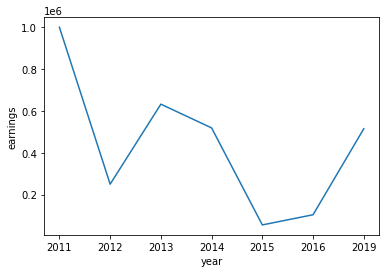

In [96]:
sns.lineplot(data = navi, x='year', y='earnings')

In [74]:
naviros = roster_df[roster_df['team'] == 'Natus Vincere']
naviros

,year,team,id,role_at_event,country,full_name,date_of_birth,profile_url
0,2011,Natus Vincere,Artstyle,Carry,Ukraine,Ivan Antonov,1989-04-20,https://liquipedia.net/dota2/Artstyle
1,2011,Natus Vincere,Dendi,Solo Middle,Ukraine,Danil Ishutin,1989-12-30,https://liquipedia.net/dota2/Dendi
2,2011,Natus Vincere,XBOCT,Offlaner,Ukraine,Oleksandr Dashkevych,1990-12-29,https://liquipedia.net/dota2/XBOCT
3,2011,Natus Vincere,Puppey,Support,Estonia,Clement Ivanov,1990-03-06,https://liquipedia.net/dota2/Puppey
4,2011,Natus Vincere,LighTofHeaveN,Hard Support,Russia,Dmitry Kupriyanov,1988-01-04,https://liquipedia.net/dota2/LighTofHeaveN
45,2012,Natus Vincere,XBOCT,Carry,Ukraine,Oleksandr Dashkevych,1990-12-29,https://liquipedia.net/dota2/XBOCT
46,2012,Natus Vincere,Dendi,Solo Middle,Ukraine,Danil Ishutin,1989-12-30,https://liquipedia.net/dota2/Dendi
47,2012,Natus Vincere,LighTofHeaveN,Offlaner,Russia,Dmitry Kupriyanov,1988-01-04,https://liquipedia.net/dota2/LighTofHeaveN
48,2012,Natus Vincere,Puppey,Support,Estonia,Clement Ivanov,1990-03-06,https://liquipedia.net/dota2/Puppey
49,2012,Natus Vincere,Ars-Art,Hard Support,Russia,Sergey Revin,1988-08-12,https://liquipedia.net/dota2/Ars-Art


In [ ]:
#pd.pivot_table(data = roster_df, index = ['year', 'team'], columns = 'id', values = 'id')

In [102]:
naviros.pivot('year', 'role_at_event', 'id')

role_at_event,Carry,Hard Support,Offlaner,Solo Middle,Support
year,,,,,
2011,Artstyle,LighTofHeaveN,XBOCT,Dendi,Puppey
2012,XBOCT,Ars-Art,LighTofHeaveN,Dendi,Puppey
2013,XBOCT,KuroKy,Funn1k,Dendi,Puppey
2014,XBOCT,KuroKy,Funn1k,Dendi,Puppey
2015,XBOCT,Artstyle,Funn1k,Dendi,SoNNeikO
2016,Ditya_Ra,Artstyle,GeneRaL,Dendi,SoNNeikO
2019,Crystallize,SoNNeikO,Blizzy,MagicaL,Zayac


In [112]:
joindf = turnamen_df[['year', 'team', 'earnings']].merge(roster_df[['year', 'id']], how = 'left', on = 'year')
joindf

,year,team,earnings,id
0,2011,Natus Vincere,1000000,Artstyle
1,2011,Natus Vincere,1000000,Dendi
2,2011,Natus Vincere,1000000,XBOCT
3,2011,Natus Vincere,1000000,Puppey
4,2011,Natus Vincere,1000000,LighTofHeaveN
...,...,...,...,...
10975,2021,SG esports,100000,Raven
10976,2021,SG esports,100000,ChYuan
10977,2021,SG esports,100000,Deth
10978,2021,SG esports,100000,Jabz


In [113]:
joindf.set_index('year', inplace=True)

In [117]:
joindf.groupby(['year', 'team'])['earnings'].sum()

year  team            
2011  EHOME                10000000
      Invictus Gaming       1400000
      Meet Your Makers      3200000
      MiTH                  1000000
      Moscow Five           1400000
                            ...    
2021  Team Undying         54027000
      Thunder Predator      9000000
      Vici Gaming         126054000
      Virtus.pro          126054000
      beastcoast           54027000
Name: earnings, Length: 142, dtype: int64